## Tampons vs Positives
### Click on top of the right corner to see plotly plot

In [1]:
import pandas as pd
import seaborn as sns
import datetime
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

pd.options.mode.chained_assignment = None

In [2]:
csvname = ["23.02","24.02","25.02","26.02","27.02","28.02","29.02","01.03","02.03","03.03","04.03","05.03","06.03"]

In [4]:
dfall = []
# extract data from carlotorniai github repository
# TODO: scrape data available 
for i in csvname:
  #  print(i)
    dftmp = pd.read_csv('https://raw.githubusercontent.com/carlotorniai/COVID-19-Italy/develop/data/csv/'+i+'.csv')
    dftmp['data'] = i
    dftmp = dftmp[dftmp['Regione'] != 'Somma Totale']
    dftmp['Tamponi/Positivi'] = round(dftmp['Tamponi'] / dftmp['Totale Positivi'],1)
    dftmp["Regione"] = dftmp.Regione.apply(lambda x: 'Emilia Romagna' if x == 'Emila Romanga' else x)
    dftmp["data_pars"] = dftmp.data.apply(lambda x: datetime.datetime.strptime((x+'.2020'), '%d.%m.%Y'))
    dfall.append(dftmp)
   # dfall['data'] = i+'2020'

In [5]:
dfclean = pd.concat(dfall).fillna(0)

In [6]:
#dfclean.head(3)

In [7]:
import plotly.express as px

In [8]:
df = dfclean.query('Regione == "Lombardia" or Regione == "Veneto" or Regione == "Emilia Romagna"')

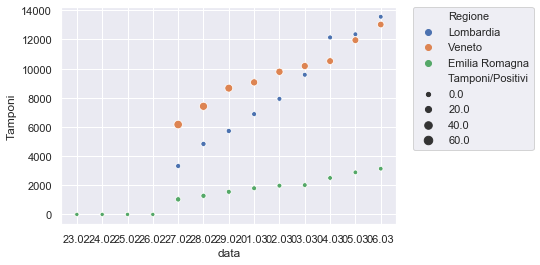

In [9]:
sns.scatterplot(x="data", y="Tamponi",
                     hue="Regione", size="Tamponi/Positivi",legend = "brief",
                     data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
## PLOTLY INTERACTIVE
### to see it click on theta symbol next to first chunk
fig = px.scatter(df, x="data_pars", y="Tamponi", color="Regione",
                 hover_name="Totale Positivi",
              size="Tamponi/Positivi")

fig.show()